<img src="The-Northcap-University-NCU-logo.png">

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# You can safely ignore any warnings on importing this
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Simple y=mx+b+noise data

In [ ]:
m = 2
b = 3
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101)
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [ ]:
y = 2*x + b + noise

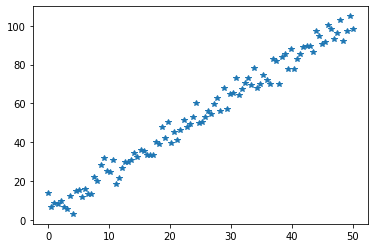

In [ ]:
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [ ]:

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [ ]:
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 3ms/step - loss: 3715.9563
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 3715.5256
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 3715.1118
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 3714.6821
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 3714.2646
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 3713.8379
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 3713.4104
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 3712.9734
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 3712.5522
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 3712.1125
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 3711.6663
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 3711.2351
Epoch 13/500
4/4 [=======

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [ ]:
x_for_predictions = np.linspace(0,50,1000)

In [ ]:
y_predicted = model.predict(x_for_predictions)

32/32 [==============================] - 1s 1ms/step


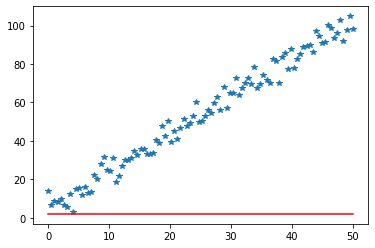

In [ ]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

# Evaluating Our Error

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
# Labels we do know
prediction_for_true_y = model.predict(x)

4/4 [==============================] - 0s 4ms/step


In [ ]:
mean_squared_error(y,prediction_for_true_y)

3509.352443171947

In [ ]:
mean_absolute_error(y,prediction_for_true_y)

51.7035853671438

 Notice how MSE value was being reported out by Keras during training!

 Is this a good error value? Really depends on the context!